In [1]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

nsmc_train_df=pd.read_csv('ratings_train.txt',encoding='utf8',sep='\t',engine='python')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
nsmc_train_df=nsmc_train_df[nsmc_train_df['document'].notnull()]

In [5]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [6]:
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [7]:
import re
nsmc_train_df['document']=nsmc_train_df['document'].apply(lambda x:re.sub(r'[^ ㄱ-ㅣ가-힣+]+','',x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [8]:
nsmc_test_df=pd.read_csv('ratings_test.txt',encoding='utf8',sep='\t',engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [9]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [10]:
nsmc_test_df=nsmc_test_df[nsmc_test_df['document'].notnull()]

In [11]:
nsmc_test_df['label'].value_counts()

1    25171
0    24826
Name: label, dtype: int64

In [12]:
nsmc_test_df['document']=nsmc_test_df['document'].apply(lambda x:re.sub(r'[^ ㄱ-ㅣ가-힣+]+','',x))

In [13]:
from konlpy.tag import Okt
okt=Okt()

In [14]:
def okt_tokenizer(text):
    tokens=okt.morphs(text)
    return tokens

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(tokenizer=okt_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf=tfidf.transform(nsmc_train_df['document'])

In [16]:
from sklearn.linear_model import LogisticRegression

SA_lr=LogisticRegression(random_state=0)

In [17]:
SA_lr.fit(nsmc_train_tfidf,nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [18]:
from sklearn.model_selection import GridSearchCV

params={'C':[1,3,3.5,4,4.5,5]}
SA_lr_grid_cv=GridSearchCV(SA_lr,param_grid=params,cv=3,scoring='accuracy',verbose=1)

In [19]:
SA_lr_grid_cv.fit(nsmc_train_tfidf,nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   48.6s finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [20]:
print(SA_lr_grid_cv.best_params_,round(SA_lr_grid_cv.best_score_,4))

{'C': 3} 0.8552


In [21]:
SA_lr_best=SA_lr_grid_cv.best_estimator_

In [22]:
nsmc_test_tfidf=tfidf.transform(nsmc_test_df['document'])

In [23]:
test_predict=SA_lr_best.predict(nsmc_test_tfidf)

In [24]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ',round(accuracy_score(nsmc_test_df['label'],test_predict),3))

감성 분석 정확도 :  0.857


In [25]:
st=input('감성 분석할 문장 입력 >>')

감성 분석할 문장 입력 >>야호


In [26]:
st=re.compile(r'[ㄱ-ㅣ가-힣+]+').findall(st)
print(st)
st=[" ".join(st)]
print(st)

['야호']
['야호']


In [27]:
st_tfidf=tfidf.transform(st)
st_predict=SA_lr_best.predict(st_tfidf)

In [28]:
if(st_predict==0):
    print(st,"->> 부정 감성")
else:
    print(st,"->> 긍정 감성")

['야호'] ->> 긍정 감성


In [29]:
import json
file_name='카카오_뉴스(utf변환)'
with open(file_name+'.json',encoding='utf-8')as j_f:
    data=json.load(j_f)

In [30]:
print(data)

[{'Column1': 0, '제목': '\n이쯤되면 살만하지 않아?…카카오를 보는 시선이 달라지고 있다\n', '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005058185&office_id=009&code=035720&page=1&sm=title_entity_id.basic', '정보제공': '매일경제', '날짜': ' 2022.12.10 07:01'}, {'Column1': 1, '제목': '\n"네이버·카카오 금융복합기업집단 지정해 리스크 대비해야"\n', '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005189900&office_id=277&code=035720&page=1&sm=title_entity_id.basic', '정보제공': '아시아경제', '날짜': ' 2022.12.09 16:52'}, {'Column1': 2, '제목': '\n신한카드, 공인전자문서 중계 서비스 9부 능선…카카오·KT 등과 경쟁\n', '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0005384254&office_id=018&code=035720&page=1&sm=title_entity_id.basic', '정보제공': '이데일리', '날짜': ' 2022.12.09 16:19'}, {'Column1': 3, '제목': '\n네이버·카카오, 간밤 나스닥 반등에 동반 ↑\n', '링크': 'https://finance.naver.com//item/news_read.naver?article_id=0004785399&office_id=015&code=035720&page=1&sm=title_entity_id.basic', '정보제공': '한국경제', '날짜': ' 2022.12.09 09:39'}, {'Column1': 4, '제목': '\n코스피, 美 증

In [31]:
data_title=[]

for item in data:
    data_title.append(item['제목'])

In [32]:
data_title

['\n이쯤되면 살만하지 않아?…카카오를 보는 시선이 달라지고 있다\n',
 '\n"네이버·카카오 금융복합기업집단 지정해 리스크 대비해야"\n',
 '\n신한카드, 공인전자문서 중계 서비스 9부 능선…카카오·KT 등과 경쟁\n',
 '\n네이버·카카오, 간밤 나스닥 반등에 동반 ↑\n',
 '\n코스피, 美 증시 훈풍에 상승…네이버·카카오 3%대 강세 [개장시황]\n',
 "\n'카카오 블랙아웃 방지법' 국회 통과\n",
 '\n"플랫폼도 국가재난계획에 포함"…\'카카오 블랙아웃 방지법\' 국회 통과\n',
 '\n카카오·두나무·위메이드, 인연과 악연 사이\n',
 "\n'뼈 아팠던 서비스 장애' 카카오, 시스템 영역별 다중화 이어간다\n",
 "\n카카오, '모두를 위한 AI' 도전 이어간다\n",
 '\n커리어데이, 카카오·구글 출신 황성현 경영고문 영입\n',
 '\n"샤넬 향수 사면 뷰티 클래스 초대장" 카카오, \'기프트엑스\' 출시\n',
 '\n"카톡에서 선물하면 샤넬 뷰티 클래스에 초대"...카카오, 기프트엑스...\n',
 '\n카카오, ‘시스템 다중화’로 먹통 막는다\n',
 '\n카카오의 고백…"끊긴 다리와 같았다"\n',
 '\n카카오의 뼈아픈 고백…"완성되지 않은 다리로 섬 이었다"\n',
 '\n카카오, 시스템 전체 다중화로 먹통 방지…"서비스 안정화가 최우선"\n',
 '\n‘반성의 장’된 카카오 개발자 콘퍼런스, 먹통 재발방지안 공개\n',
 '\n“시스템 다중화·비상대응 체계 구축” 먹통 재발 방지대책 내놓은 카카...\n',
 '\n카카오가 직접 다 밝혔다 "카카오 대란의 원인은…"\n',
 '\n중국이 퍼간 국내 웹툰·웹소설, 카카오엔터가 104만건 잡아냈다\n',
 '\n카카오엔터, 8개월간 불법 웹툰·웹소설 688만건 차단\n',
 '\n(영상) 카카오 "먹통사태 이중화 미흡 때문"...재발방지책 발표\n',
 '\n"본질 놓쳤다" 반성문 쓴 카카오, 5년간 투자 3배 확대(종합)\n',
 '\n서울산업진흥원, 네이버·카카

In [33]:
data_df=pd.DataFrame({'title':data_title})

In [34]:
data_df['title']=data_df['title'].apply(lambda x:re.sub(r'[^ ㄱ-ㅣ가-힣+]+','',x))
data_df.head()

,title
0,이쯤되면 살만하지 않아카카오를 보는 시선이 달라지고 있다
1,네이버카카오 금융복합기업집단 지정해 리스크 대비해야
2,신한카드 공인전자문서 중계 서비스 부 능선카카오 등과 경쟁
3,네이버카카오 간밤 나스닥 반등에 동반
4,코스피 증시 훈풍에 상승네이버카카오 대 강세 개장시황


In [35]:
data_title_tfidf=tfidf.transform(data_df['title'])
data_title_predict=SA_lr_best.predict(data_title_tfidf)
data_df['title_label']=data_title_predict

In [36]:
data_df.to_csv(file_name+'_감성분석결과.csv',encoding='euc-kr')

In [37]:
data_df.head()

,title,title_label
0,이쯤되면 살만하지 않아카카오를 보는 시선이 달라지고 있다,1
1,네이버카카오 금융복합기업집단 지정해 리스크 대비해야,1
2,신한카드 공인전자문서 중계 서비스 부 능선카카오 등과 경쟁,0
3,네이버카카오 간밤 나스닥 반등에 동반,1
4,코스피 증시 훈풍에 상승네이버카카오 대 강세 개장시황,1


In [38]:
print(data_df['title_label'].value_counts())

0    3583
1    1429
Name: title_label, dtype: int64


In [39]:
columns_name=['title','title_label']
NEG_data_df=pd.DataFrame(columns=columns_name)
POS_data_df=pd.DataFrame(columns=columns_name)

for i,data in data_df.iterrows():
    title=data["title"]
    t_label=data["title_label"]
    
    if t_label==0:
        NEG_data_df=NEG_data_df.append(pd.DataFrame([[title,t_label]],columns=columns_name),ignore_index=True)
    else:
        POS_data_df=POS_data_df.append(pd.DataFrame([[title,t_label]],columns=columns_name),ignore_index=True)

NEG_data_df.to_csv(file_name+'_부정.csv',encoding='euc-kr')
POS_data_df.to_csv(file_name+'_긍정.csv',encoding='euc-kr')

In [40]:
len(NEG_data_df), len(POS_data_df)

(3583, 1429)

In [41]:
POS_title=POS_data_df['title']

In [42]:
POS_title_noun_tk=[]

for t in POS_title:
    POS_title_noun_tk.append(okt.nouns(t))

In [43]:
print(POS_title_noun_tk)

[['이쯤', '살', '만하', '카카오', '시선'], ['네이버', '카카오', '금융', '복합', '기업', '집단', '지정', '리스크', '대비'], ['네이버', '카카오', '간밤', '나스닥', '반등', '동반'], ['코스피', '증시', '훈풍', '상승', '네이버', '카카오', '강세', '개장', '황'], ['카카오', '블랙아웃', '방지법', '국회', '통과'], ['플랫폼', '국가', '재난', '계획', '포함', '카카오', '블랙아웃', '방지법', '국회', '통과'], ['카카오', '나무', '위메이드', '인연', '악연', '사이'], ['카카오', '모두', '위', '도전', '간다'], ['카카오', '고백', '다리'], ['카카오', '뼈', '완성', '다리', '섬'], ['카카오', '직접', '카카오', '대란', '원인'], ['산업', '진흥', '네이버', '카카오', '온라인', '판로', '개척'], ['두', '번', '실수', '카카오', '대표', '직속', '인프라', '컨트롤', '타워'], ['카카오', '사태', '사회', '책임', '소명', '것'], ['센트', '온', '카카오', '모빌리티', '처', '향기', '개발'], ['과', '정통부', '카카오', '재발', '방지', '달', '내', '제출'], ['월드컵', '강', '진출', '네이버', '카카오', '특수'], ['먹통', '달', '재발', '방지책', '발표', '카카오'], ['허리띠', '졸라맨', '네이버', '카카오', '목표', '주가', '개월'], ['네이버', '카카오', '나스닥', '훈풍', '상승'], ['나스닥', '급등', '네이버', '카카오', '강세', '카카오', '페이', '개장', '황'], ['카카오', '메이커', '스', '상생', '프로그램', '버', '가치', '누적', '거래', '액', '억', '돌파'], ['카카오', '메이커', '

In [44]:
POS_title_noun_join=[]

for t in POS_title_noun_tk:
    t2=[w for w in t if len(t)>1]
    POS_title_noun_join.append(" ".join(t2))

In [45]:
print(POS_title_noun_join)

['이쯤 살 만하 카카오 시선', '네이버 카카오 금융 복합 기업 집단 지정 리스크 대비', '네이버 카카오 간밤 나스닥 반등 동반', '코스피 증시 훈풍 상승 네이버 카카오 강세 개장 황', '카카오 블랙아웃 방지법 국회 통과', '플랫폼 국가 재난 계획 포함 카카오 블랙아웃 방지법 국회 통과', '카카오 나무 위메이드 인연 악연 사이', '카카오 모두 위 도전 간다', '카카오 고백 다리', '카카오 뼈 완성 다리 섬', '카카오 직접 카카오 대란 원인', '산업 진흥 네이버 카카오 온라인 판로 개척', '두 번 실수 카카오 대표 직속 인프라 컨트롤 타워', '카카오 사태 사회 책임 소명 것', '센트 온 카카오 모빌리티 처 향기 개발', '과 정통부 카카오 재발 방지 달 내 제출', '월드컵 강 진출 네이버 카카오 특수', '먹통 달 재발 방지책 발표 카카오', '허리띠 졸라맨 네이버 카카오 목표 주가 개월', '네이버 카카오 나스닥 훈풍 상승', '나스닥 급등 네이버 카카오 강세 카카오 페이 개장 황', '카카오 메이커 스 상생 프로그램 버 가치 누적 거래 액 억 돌파', '카카오 메이커 스 농축 수산물 판로 개척 누적 거래 액 억 돌파', '실적 하향 네이버 카카오 신규 매출 비용 절감 필요', '카카오 중소 사업자 대상 개인 정보보호 교육', '카카오 중소 사업자 개인 정보보호 온라인 교육', '카카오 먹통 방지책 남궁훈 치부 공개 성장 기회 것', '남궁훈 카카오 규모 기업 치부 공개 세계 일', '당근 마켓 카카오 출신 황도연 신임 대표 내정 김재현 대표 로', '코스피 개인 사자 상승 출발 카카오 강세 개장 황', '키위 플러스 카카오 키즈 폰 등 매출 성장 세 월 누적 매출', '국민 주 카카오 동학 개미', '카카오 소상 공인 대상 상생 기획전 연', '카타르 월드컵 오픈 채팅 응원 카카오', '카카오 문어 발 확장 기업 결합 신고 기준 정비', '카카오 먹통 방지법 통과 주목 데이터 관련 주', '카카오 스타일 패션 바이 카카오 입점 스토

In [46]:
NEG_title=NEG_data_df['title']

NEG_title_noun_tk=[]
NEG_title_noun_join=[]

for t in NEG_title:
    NEG_title_noun_tk.append(okt.nouns(t))
    
for t in NEG_title_noun_tk:
    t2=[w for w in t if len(t)>1]
    NEG_title_noun_join.append(" ".join(t2))

In [47]:
POS_tfidf=TfidfVectorizer(tokenizer=okt_tokenizer,min_df=2)
POS_dtm=POS_tfidf.fit_transform(POS_title_noun_join)

In [48]:
POS_vocab=dict()

for idx,word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word]=POS_dtm.getcol(idx).sum()
    
POS_words=sorted(POS_vocab.items(),key=lambda x:x[1],reverse=True)

In [49]:
POS_words

[('카카오', 112.76841117365694),
 ('네이버', 54.54991027758133),
 ('모빌리티', 30.803418901255068),
 ('주가', 26.902908220129373),
 ('성장', 24.418144049570728),
 ('대표', 19.21845154266439),
 ('남궁훈', 19.024420516513757),
 ('개미', 18.479377633948708),
 ('실적', 18.34361058446239),
 ('버스', 18.330730027026743),
 ('목표', 17.661938323539857),
 ('메타', 17.062399864750876),
 ('먹통', 16.915388044135884),
 ('코스피', 16.82944174622232),
 ('년', 16.615880612628896),
 ('기업', 15.232609797562633),
 ('신저', 14.710949350418462),
 ('분기', 14.28232030952076),
 ('급락', 14.124843586718129),
 ('상승', 13.91862475670264),
 ('올해', 13.675082619207497),
 ('매출', 13.532080985960505),
 ('주', 13.417537775073871),
 ('터', 12.71606523074861),
 ('플랫폼', 12.518957916279028),
 ('위', 12.515368635129537),
 ('형제', 12.47504035707417),
 ('엔터프라이즈', 11.979449885682214),
 ('거래', 11.903342063879705),
 ('김범수', 11.834061854066169),
 ('다시', 11.72209871346347),
 ('또', 11.33365815928795),
 ('나스닥', 11.329200866516167),
 ('스', 11.21764313835325),
 ('것', 11.01114613

In [50]:
NEG_tfidf=TfidfVectorizer(tokenizer=okt_tokenizer,min_df=2)
NEG_dtm=NEG_tfidf.fit_transform(NEG_title_noun_join)

In [51]:
NEG_vocab=dict()

for idx,word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word]=NEG_dtm.getcol(idx).sum()
    
NEG_words=sorted(NEG_vocab.items(),key=lambda x:x[1],reverse=True)

In [52]:
NEG_words

[('카카오', 259.88048205264425),
 ('네이버', 100.9747397501271),
 ('모빌리티', 98.68923161676665),
 ('주', 73.04073371467983),
 ('특징', 56.582322023823316),
 ('먹통', 53.77640182763656),
 ('매각', 49.86295213702337),
 ('억', 48.877948654004264),
 ('주가', 44.86553923703893),
 ('투자', 43.194335140914895),
 ('년', 41.28291131331791),
 ('목표', 38.32996005677258),
 ('하락', 37.73393675311425),
 ('영업', 37.382607895191185),
 ('터', 35.52811351036467),
 ('신저', 34.62967430287613),
 ('센터', 34.55013185767854),
 ('플랫폼', 33.632471115325856),
 ('서비스', 33.53496508727497),
 ('대표', 33.41529662814594),
 ('피해', 32.83984028356191),
 ('분기', 32.62637110864459),
 ('사태', 31.93293506463762),
 ('김범수', 31.818477581739483),
 ('만원', 31.783326897815652),
 ('보상', 30.332443682801664),
 ('익', 29.460335971352258),
 ('남궁훈', 29.234690250910816),
 ('택시', 28.179584849795063),
 ('단독', 27.39150989420188),
 ('시장', 26.780308102807535),
 ('실적', 26.254656332628556),
 ('분', 26.20546677164076),
 ('코스피', 25.898596101465102),
 ('성장', 24.85844403824038),
 (

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location='C:/Windows/fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

max=15

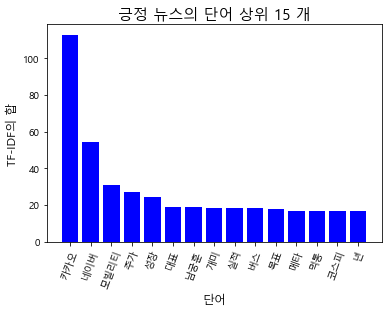

In [54]:
plt.bar(range(max),[i[1] for i in POS_words[:max]],color="blue")
plt.title("긍정 뉴스의 단어 상위 %d 개"%max,fontsize=15)
plt.xlabel("단어",fontsize=12)
plt.ylabel("TF-IDF의 합",fontsize=12)
plt.xticks(range(max),[i[0]for i in POS_words[:max]],rotation=70)

plt.show()

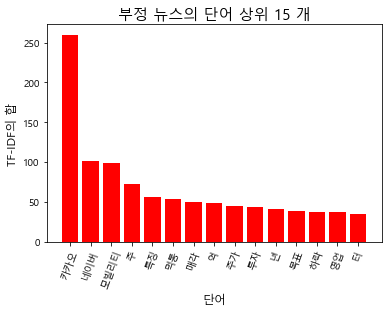

In [55]:
plt.bar(range(max),[i[1] for i in NEG_words[:max]],color="red")
plt.title("부정 뉴스의 단어 상위 %d 개"%max,fontsize=15)
plt.xlabel("단어",fontsize=12)
plt.ylabel("TF-IDF의 합",fontsize=12)
plt.xticks(range(max),[i[0]for i in NEG_words[:max]],rotation=70)

plt.show()

In [56]:
title=data_df['title']

In [57]:
title_noun_tk=[]

for t in title:
    title_noun_tk.append(okt.nouns(t))

In [58]:
title_noun_tk2=[]

for t in title_noun_tk:
    item=[i for i in t if len(i)>1]
    title_noun_tk2.append(item)

In [59]:
print(title_noun_tk2)

[['이쯤', '만하', '카카오', '시선'], ['네이버', '카카오', '금융', '복합', '기업', '집단', '지정', '리스크', '대비'], ['신한카드', '공인', '전자문서', '중계', '서비스', '능선', '카카오', '경쟁'], ['네이버', '카카오', '간밤', '나스닥', '반등', '동반'], ['코스피', '증시', '훈풍', '상승', '네이버', '카카오', '강세', '개장'], ['카카오', '블랙아웃', '방지법', '국회', '통과'], ['플랫폼', '국가', '재난', '계획', '포함', '카카오', '블랙아웃', '방지법', '국회', '통과'], ['카카오', '나무', '위메이드', '인연', '악연', '사이'], ['서비스', '장애', '카카오', '시스템', '영역', '다중화', '간다'], ['카카오', '모두', '도전', '간다'], ['커리어', '데이', '카카오', '구글', '출신', '황성현', '경영', '고문'], ['샤넬', '향수', '사면', '뷰티', '클래스', '초대장', '카카오', '기프트', '엑스', '출시'], ['카톡', '선물', '샤넬', '뷰티', '클래스', '초대', '카카오', '기프트', '엑스'], ['카카오', '시스템', '다중화', '먹통'], ['카카오', '고백', '다리'], ['카카오', '완성', '다리'], ['카카오', '시스템', '전체', '다중화', '먹통', '방지', '서비스', '안정화', '우선'], ['반성', '카카오', '개발자', '콘퍼런스', '먹통', '재발', '방지', '공개'], ['시스템', '다중화', '비상', '대응', '체계', '구축', '먹통', '재발', '방지', '대책', '카카'], ['카카오', '직접', '카카오', '대란', '원인'], ['중국', '퍼간', '국내', '웹툰', '웹소설', '카카오'], ['카카오', '월간', '불법', '웹툰', '웹소설', '차단

In [60]:
import gensim
import gensim.corpora as corpora

In [61]:
dictionary=corpora.Dictionary(title_noun_tk2)

In [62]:
corpus=[dictionary.doc2bow(word)for word in title_noun_tk2]

In [63]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(3, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(3, 1), (6, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(3, 1), (6, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(3, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(3, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(3, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(3, 1), (15, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(3, 1), (43, 1), (48, 1), (49, 1)], [(3, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(3, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(3, 1), (57, 1), (58, 1), (60, 1), (61, 1), (64, 1), (66, 1), (67, 1), (68, 1)], [(3, 1), (44, 1), (45, 1), (69, 1)], [(3, 1), (70, 1), (71, 1)], [(3, 1), (71, 1), (72, 1)], [(3, 1), (15, 1), (44, 1), (45, 1), (69, 1), (73, 1), (74,

In [64]:
k=5 #토픽 개수

In [65]:
lda_model=gensim.models.ldamulticore.LdaMulticore(corpus,iterations=12,num_topics=k,id2word=dictionary,passes=1,workers=10)

In [66]:
print(lda_model.print_topics(num_topics=k,num_words=15))

[(0, '0.158*"카카오" + 0.019*"네이버" + 0.018*"모빌리티" + 0.011*"특징" + 0.007*"매각" + 0.006*"먹통" + 0.006*"주가" + 0.006*"코스피" + 0.006*"투자" + 0.006*"성장" + 0.005*"택시" + 0.005*"사업" + 0.005*"영업" + 0.004*"시장" + 0.004*"서비스"'), (1, '0.147*"카카오" + 0.015*"네이버" + 0.010*"먹통" + 0.010*"모빌리티" + 0.009*"주가" + 0.009*"목표" + 0.007*"남궁훈" + 0.007*"피해" + 0.006*"개미" + 0.006*"보상" + 0.005*"분기" + 0.005*"김범수" + 0.005*"투자" + 0.005*"매각" + 0.005*"택시"'), (2, '0.136*"카카오" + 0.027*"모빌리티" + 0.015*"네이버" + 0.012*"대표" + 0.007*"먹통" + 0.007*"단독" + 0.006*"투자" + 0.006*"버스" + 0.006*"남궁훈" + 0.006*"메타" + 0.006*"센터" + 0.005*"플랫폼" + 0.005*"매각" + 0.005*"서비스" + 0.005*"속보"'), (3, '0.133*"카카오" + 0.013*"네이버" + 0.010*"주가" + 0.008*"목표" + 0.007*"사태" + 0.007*"대표" + 0.006*"먹통" + 0.006*"매출" + 0.005*"코스피" + 0.005*"모빌리티" + 0.004*"금융" + 0.004*"실적" + 0.004*"만원" + 0.004*"신저" + 0.004*"분기"'), (4, '0.103*"카카오" + 0.047*"네이버" + 0.012*"신저" + 0.008*"플랫폼" + 0.007*"먹통" + 0.007*"특징" + 0.007*"급락" + 0.006*"상생" + 0.006*"기술" + 0.006*"김범수" + 0.006*"성장" + 0.005*"실적" + 0.005*

In [70]:
import os
os.environ["PYTHONIOENCODING"]="utf-8"

import pyLDAvis.gensim_models


lda_vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,dictionary)

In [71]:
pyLDAvis.display(lda_vis)

In [72]:
pyLDAvis.save_html(lda_vis,file_name+"_토픽분석.html")